In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.0


In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 41kB/s 


In [1]:
import csv
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import plot_model
from keras.models import Model
import os
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate






# load all models
model1=load_model("/content/drive/MyDrive/covidResnet11_epoch10.h5")
model2=load_model("/content/drive/MyDrive/covidResnet12_epoch10.h5")
model3=load_model("/content/drive/MyDrive/covidResnet13_epoch10.h5")
model4=load_model("/content/drive/MyDrive/covidResnet14_epoch10.h5")
model5=load_model("/content/drive/MyDrive/covidResnet15_epoch10.h5")
from keras.models import Sequential

# define ensemble model

# fit stacked model on test dataset
datagen = ImageDataGenerator(
    rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
Xtrain = []
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []
from os import walk
import shutil
f0 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVID1.1/0'):

    f0.extend(filenames)
    break

f1 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVID1.1/1'):

    f1.extend(filenames)
    break

f2 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVID1.2/1'):

    f2.extend(filenames)
    break

f3 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVID1.3/1'):

    f3.extend(filenames)
    break

f4 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVID1.4/1'):
    f4.extend(filenames)
    break

f5 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVID1.5/1'):
    f5.extend(filenames)
    break

count =0
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv', mode='w') as file:
    filewriter = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    for i in f0:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVID1.1/0/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder/")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(1)
        x.append(0)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f1:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVID1.1/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
            
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f2:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVID1.2/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
           
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)


    for i in f3:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVID1.3/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f4:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVID1.4/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
      
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
    for i in f5:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVID1.5/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
            
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

1
287.jpg
Found 1 images belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Streaming output truncated to the last 5000 lines.
c6d80dabf652f2d42ff58e63d45bbf_big_gallery (1).jpeg
Found 1 images belonging to 1 classes.
4661
dfbc0189c71ac92421bb62366e1db2_big_gallery (1).jpeg
Found 1 images belonging to 1 classes.
4662
35c6ef75b4b85a2b4e80d10f4eca0b_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4663
cd20811fd099702b9743c70fe02f1f_big_gallery (1).jpeg
Found 1 images belonging to 1 classes.
4664
fe8e82e13f7ee99d58fcc2b917d6a6_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4665
4010c2a372cd5d4fe9b1996b323c01_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4666
c2f2e329a8daabc1e56154cddabae2_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4667
a588979b0f8394321ecf2edb866732_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4668
020d15ac4471292c28919e21317f7b_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4669
a05c3271bb4b64729579e9847c1b05_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4670
56f25ffa25bc57651

In [2]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.9036334913112164


In [3]:
import csv
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import plot_model
from keras.models import Model
import os
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate






# load all models
model1=load_model("/content/drive/MyDrive/covidResnet11_epoch10.h5")
model2=load_model("/content/drive/MyDrive/covidResnet12_epoch10.h5")
model3=load_model("/content/drive/MyDrive/covidResnet13_epoch10.h5")
model4=load_model("/content/drive/MyDrive/covidResnet14_epoch10.h5")
model5=load_model("/content/drive/MyDrive/covidResnet15_epoch10.h5")
from keras.models import Sequential

# define ensemble model

# fit stacked model on test dataset
datagen = ImageDataGenerator(
    rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
Xtrain = []
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []
from os import walk
import shutil
f0 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVIDTest/0'):

    f0.extend(filenames)
    break

f1 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/CT_COVIDTest/1'):

    f1.extend(filenames)
    break

count =0
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv', mode='w') as file:
    filewriter = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    for i in f0:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVIDTest/0/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder/")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(1)
        x.append(0)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f1:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/CT_COVIDTest/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
            
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)


1
3.jpg
Found 1 images belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2
188.jpg
Found 1 images belonging to 1 classes.
3
72.jpg
Found 1 images belonging to 1 classes.
4
78.jpg
Found 1 images belonging to 1 classes.
5
247.jpg
Found 1 images belonging to 1 classes.
6
267.jpg
Found 1 images belonging to 1 classes.
7
252.jpg
Found 1 images belonging to 1 classes.
8
203.jpg
Found 1 images belonging to 1 classes.
9
2.jpg
Found 1 images belonging to 1 classes.
10
198.jpg
Found 1 images belonging to 1 classes.
11
15.png
Found 1 images belonging to 1 classes.
12
134.jpg
Found 1 images belonging to 1 classes.
13
136.jpg
Found 1 images belonging to 1 classes.
14
25.png
Found 1 images belonging to 1 classes.
15
34.jpg
Found 1 images belonging to 1 classes.
16
263.jpg
Found 1 images belonging to 1 classes.
17
242.jpg
Found 1 images belonging to 1 classes.
18
114.png
Found 1 images belonging to 1 classes.
19
158.png
Found 1 images belonging to 1 classes.
20
412.png
Found 1 images belonging to 1 classes.
21
1059.png
Found 1 images belonging to 1 classes.
22
1050.png
Fo

In [4]:
!pip install scikit-plot

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.7
[[  5  45]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        50
           1       0.69      1.00      0.82       100

    accuracy                           0.70       150
   macro avg       0.84      0.55      0.50       150
weighted avg       0.79      0.70      0.60       150



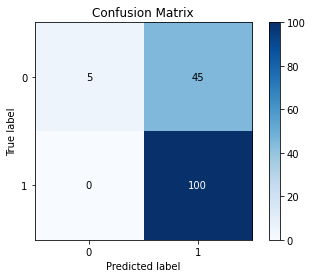

In [5]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()

In [ ]:
#extra trees

In [7]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.9004739336492891


[1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.7133333333333334
[[  7  43]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        50
           1       0.70      1.00      0.82       100

    accuracy                           0.71       150
   macro avg       0.85      0.57      0.53       150
weighted avg       0.80      0.71      0.63       150



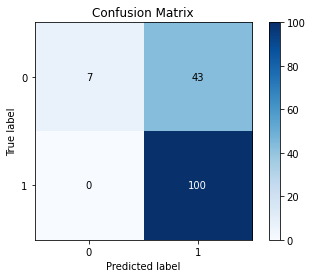

In [8]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()

In [ ]:
#ANN

In [9]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1)

from keras.models import Model
import numpy
from keras.layers import Input
from keras.layers import Dense

trainX = numpy.array(X_train)

visible = Input(shape=(10,))
c1 = Dense(8, activation='relu')(visible)
h1 = Dense(16, activation='relu')(c1)
h2 = Dense(32, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(64, activation='relu')(h3)
h5 = Dense(32, activation='relu')(h4)
h6 = Dense(16, activation='relu')(h5)
c2 = Dense(8, activation='relu')(h6)
s1 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=s1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='ensemble.png')

model.fit(trainX,y= numpy.array(y_train), epochs=50)
model.save("/content/drive/MyDrive/No-Clahe-ensembleResnetModel1.h5")
print(model.evaluate(numpy.array(X_test),numpy.array(y_test)))


Epoch 1/50
178/178 [==============================] - 1s 2ms/step - loss: 0.4447 - accuracy: 0.8798
Epoch 2/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9201
Epoch 3/50
178/178 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9161
Epoch 4/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9183
Epoch 5/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.9215
Epoch 6/50
178/178 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9120
Epoch 7/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9117
Epoch 8/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9181
Epoch 9/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9115
Epoch 10/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9185

5/5 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7333
[0.4992885887622833, 0.7333333492279053]
[[ 10  40]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        50
           1       0.71      1.00      0.83       100

    accuracy                           0.73       150
   macro avg       0.86      0.60      0.58       150
weighted avg       0.81      0.73      0.67       150



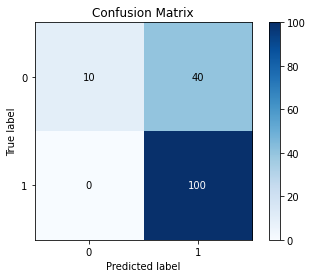

In [10]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypredict = model.predict(Xtest)
Ypred =[]
for i in Ypredict:
  if i<0.5:
    Ypred.append(0)
  else:
    Ypred.append(1)
print(model.evaluate(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()

In [11]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1)

from keras.models import Model
import numpy
from keras.layers import Input
from keras.layers import Dense

trainX = numpy.array(X_train)

visible = Input(shape=(10,))
c1 = Dense(8, activation='relu')(visible)
h1 = Dense(16, activation='relu')(c1)
h2 = Dense(32, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(64, activation='relu')(h3)
h5 = Dense(32, activation='relu')(h4)
h6 = Dense(16, activation='relu')(h5)
c2 = Dense(8, activation='relu')(h6)
s1 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=s1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='ensemble.png')

model.fit(trainX,y= numpy.array(y_train), epochs=40)
model.save("/content/drive/MyDrive/No-Clahe-ensembleResnetModel2.h5")
print(model.evaluate(numpy.array(X_test),numpy.array(y_test)))


Epoch 1/40
178/178 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.9151
Epoch 2/40
178/178 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9205
Epoch 3/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9155
Epoch 4/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9188
Epoch 5/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9140
Epoch 6/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9213
Epoch 7/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9153
Epoch 8/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9187
Epoch 9/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9170
Epoch 10/40
178/178 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9174

5/5 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7333
[0.5240748524665833, 0.7333333492279053]
[[ 10  40]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        50
           1       0.71      1.00      0.83       100

    accuracy                           0.73       150
   macro avg       0.86      0.60      0.58       150
weighted avg       0.81      0.73      0.67       150



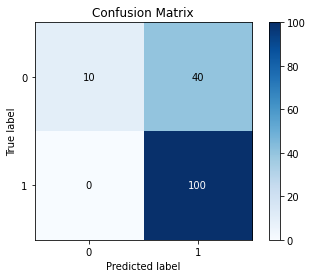

In [12]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypredict = model.predict(Xtest)
Ypred =[]
for i in Ypredict:
  if i<0.5:
    Ypred.append(0)
  else:
    Ypred.append(1)
print(model.evaluate(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()

In [13]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1)

from keras.models import Model
import numpy
from keras.layers import Input
from keras.layers import Dense

trainX = numpy.array(X_train)

visible = Input(shape=(10,))
c1 = Dense(8, activation='relu')(visible)
h1 = Dense(16, activation='relu')(c1)
h2 = Dense(32, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(64, activation='relu')(h3)
h5 = Dense(32, activation='relu')(h4)
h6 = Dense(16, activation='relu')(h5)
c2 = Dense(8, activation='relu')(h6)
s1 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=s1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='ensemble.png')

model.fit(trainX,y= numpy.array(y_train), epochs=30)
model.save("/content/drive/MyDrive/No-Clahe-ensembleResnetModel3.h5")
print(model.evaluate(numpy.array(X_test),numpy.array(y_test)))


Epoch 1/30
178/178 [==============================] - 1s 2ms/step - loss: 0.4878 - accuracy: 0.8485
Epoch 2/30
178/178 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9199
Epoch 3/30
178/178 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9245
Epoch 4/30
178/178 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9259
Epoch 5/30
178/178 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9193
Epoch 6/30
178/178 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9262
Epoch 7/30
178/178 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9211
Epoch 8/30
178/178 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9202
Epoch 9/30
178/178 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9126
Epoch 10/30
178/178 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9212

5/5 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6733
[0.6730819940567017, 0.6733333468437195]
[[  1  49]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.67      1.00      0.80       100

    accuracy                           0.67       150
   macro avg       0.84      0.51      0.42       150
weighted avg       0.78      0.67      0.55       150



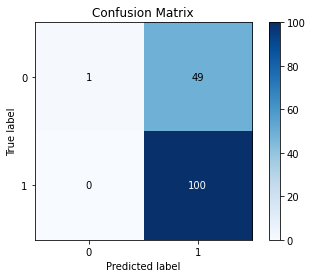

In [14]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypredict = model.predict(Xtest)
Ypred =[]
for i in Ypredict:
  if i<0.5:
    Ypred.append(0)
  else:
    Ypred.append(1)
print(model.evaluate(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()

In [ ]:
#Adaboost

In [15]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.8925750394944708


[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.72
[[  8  42]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.16      0.28        50
           1       0.70      1.00      0.83       100

    accuracy                           0.72       150
   macro avg       0.85      0.58      0.55       150
weighted avg       0.80      0.72      0.64       150



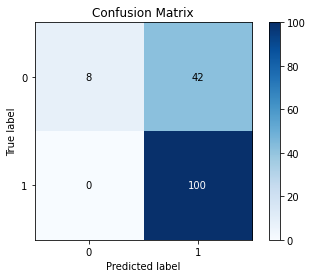

In [16]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()

In [ ]:
#Bagging

In [17]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
clf = BaggingClassifier(ExtraTreesClassifier(n_estimators=100))
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.8988941548183255


[1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.7066666666666667
[[  6  44]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        50
           1       0.69      1.00      0.82       100

    accuracy                           0.71       150
   macro avg       0.85      0.56      0.52       150
weighted avg       0.80      0.71      0.62       150



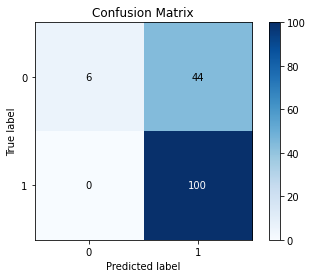

In [18]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/No-Clahe-inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()